### Speech Features

Let's try and visualize some of the common techniques used in speech representation.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import librosa
import IPython.display
import librosa.display
import os
import random
from matplotlib.pyplot import specgram

In [2]:
random.seed(42)

In [3]:
style.use('ggplot')
%matplotlib inline

For our experiments, we use the _Dataset for Environmental Sound Classification (ESC-50)_.
"The ESC-50 dataset is a public labeled set of 2000 environmental recordings (50 classes, 40 clips per class, 5 seconds per clip) suitable for environmental sound classification tasks."
You can download it from here: https://github.com/karoldvl/ESC-50

K. J. Piczak. ESC: Dataset for Environmental Sound Classification. In Proceedings of the 23rd ACM international conference on Multimedia, pp. 1015-1018, ACM, 2015.

In [4]:
data_dir = '../data/esc-50'
sample_dir = os.path.join(data_dir, 'sample')

We have chosen a small sample of the classes for demo purposes. Specifically, we have chosen sounds that have been tagged with one of the following four classes: insects, rooster, coughing, laughing.

In [5]:
print 'Sound Sample Classes'
print '--------------------'
for d in os.listdir(sample_dir):
    print d

Sound Sample Classes
--------------------
coughing
footsteps
insects
laughing
rooster


In [6]:
samples_dict = dict()
for d in os.listdir(sample_dir):
    sample_class_dir = os.path.join(sample_dir, d)
    samples_dict[d] = [os.path.join(sample_class_dir, f) for f in os.listdir(sample_class_dir)]

print 'Class \t Num Samples'
print '--------------------'
for k, v in samples_dict.iteritems():
    print k, '\t', len(v)

Class 	 Num Samples
--------------------
insects 	40
coughing 	40
footsteps 	40
laughing 	40
rooster 	40


Load the sound samples with a sampling rate of 44.1kHz, which is 44100 samples per second. When we load a .wav or .ogg file, we get a _time series_ of amplitude values. 

In [7]:
def load_file(file_path, sr=44100):
    ts, sr = librosa.load(file_path, sr=sr)
    return ts

In [8]:
def get_raw_sounds(file_paths, sr=44100):
    return [load_file(fp, sr) for fp in file_paths]

In [9]:
def plot_waves(classes, raw_sounds):
    idx = 1
    fig = plt.figure(figsize=(12, 6))
    for name, f in zip(classes, raw_sounds):
        plt.subplot(len(classes), 1, idx)
        librosa.display.waveplot(np.array(f), sr=44100)
        plt.title(name.title())
        idx += 1
    plt.suptitle('Waveplot for Raw Audio', fontsize=18)
    plt.show()

In [10]:
def plot_spectrograms(classes,raw_sounds, sr=44100):
    idx = 1
    fig = plt.figure(figsize=(12, 6))
    for name, f in zip(classes, raw_sounds):
        plt.subplot(len(classes), 1, idx)
        specgram(np.array(f), Fs=22050)
        plt.title(name.title())
        idx += 1
    plt.suptitle('Spectrogram', fontsize=18)
    plt.show()

In [11]:
def plot_log_power_spectrograms(classes,raw_sounds):
    idx = 1
    fig = plt.figure(figsize=(12,6))
    for name, f in zip(classes,raw_sounds):
        plt.subplot(len(classes), 1, idx)
        D = librosa.logamplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
        librosa.display.specshow(D, x_axis='time' , y_axis='log')
        plt.title(name.title())
        idx += 1
    plt.suptitle('Log power spectrogram', fontsize=18)
    plt.show()

#### Sample Audio and their Waveforms

Let's take a look at a few sample audio files and how their waveforms look. Notice some correspondence between how they sound and how the waveforms look.

In [12]:
sample_insect = random.choice(samples_dict.get('insects'))
IPython.display.Audio(sample_insect, embed=True, autoplay=True)

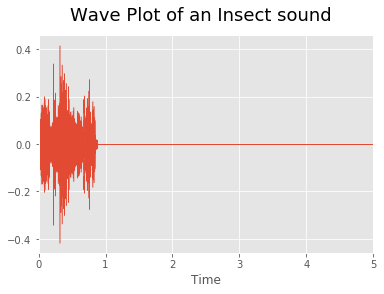

In [13]:
ts, sr = librosa.load(sample_insect)
librosa.display.waveplot(ts, sr=sr)
plt.suptitle('Wave Plot of an Insect sound', fontsize=18)

In [14]:
sample_rooster = random.choice(samples_dict.get('rooster'))
IPython.display.Audio(sample_rooster, embed=True, autoplay=True)

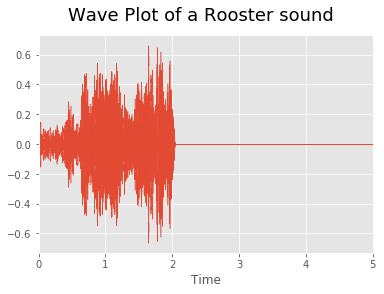

In [15]:
ts, sr = librosa.load(sample_rooster)
librosa.display.waveplot(ts, sr=sr)
plt.suptitle('Wave Plot of a Rooster sound', fontsize=18)

In [16]:
sample_coughing = random.choice(samples_dict.get('coughing'))
IPython.display.Audio(sample_coughing, embed=True, autoplay=True)

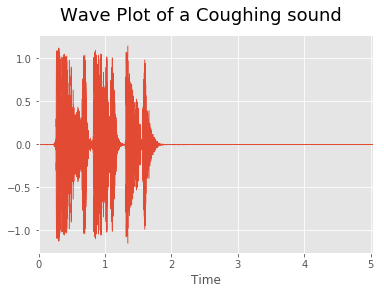

In [17]:
ts, sr = librosa.load(sample_coughing)
librosa.display.waveplot(ts, sr=sr)
plt.suptitle('Wave Plot of a Coughing sound', fontsize=18)

In [18]:
sample_laughing = random.choice(samples_dict.get('laughing'))
IPython.display.Audio(sample_laughing, embed=True, autoplay=True)

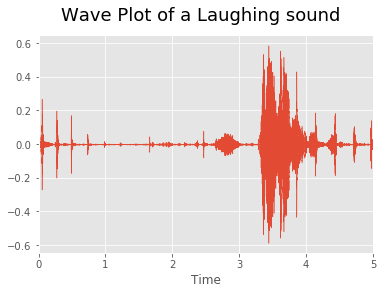

In [19]:
ts, sr = librosa.load(sample_laughing)
librosa.display.waveplot(ts, sr=sr)
plt.suptitle('Wave Plot of a Laughing sound', fontsize=18)

#### Waveplots for Raw Audio
Let's look at them together. You can notice some differences in the progression of the waveforms as well the variances in the amplitude range.

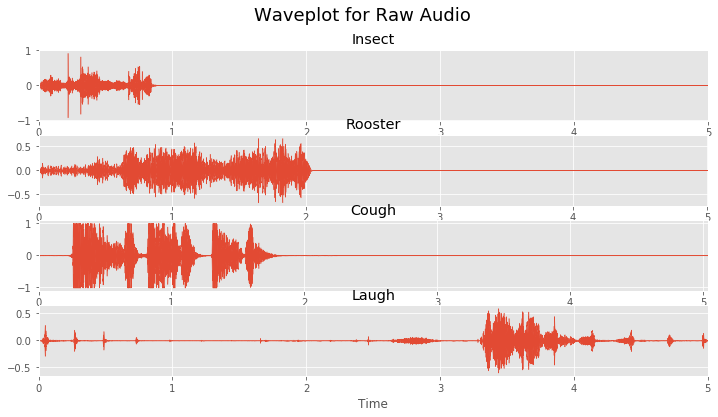

In [20]:
sound_signals = get_raw_sounds([sample_insect, sample_rooster, sample_coughing, sample_laughing])
sound_names = ['insect', 'rooster', 'cough', 'laugh'] 
plot_waves(sound_names, sound_signals)

#### Spectrogram Plots
A spectrogram measures the signal strength or a how loud a signal is at various frequencies over a period of time. In essence, you are transforming a raw audio signal to a representation that shows a contour or a "heatmap" of energy levels over time.

The plot has _time_ on the x-axis, _frequency_ on the y-axis, and the amplitude values are sort of compressed and stacked to form a contour.

You can see the spectrograms for the above sample sounds.

/Users/sanket/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:7235: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


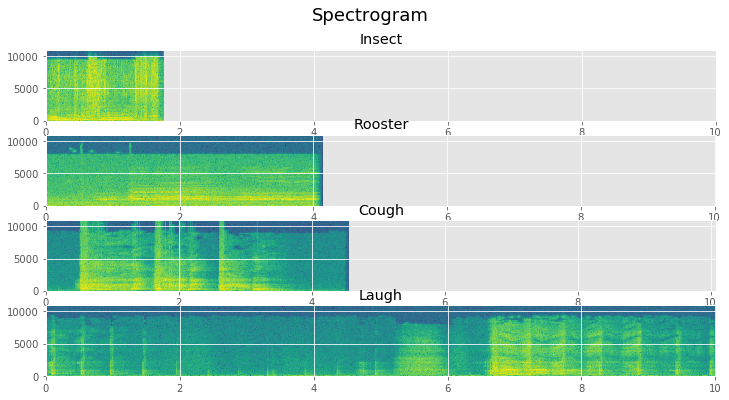

In [21]:
plot_spectrograms(sound_names, sound_signals)

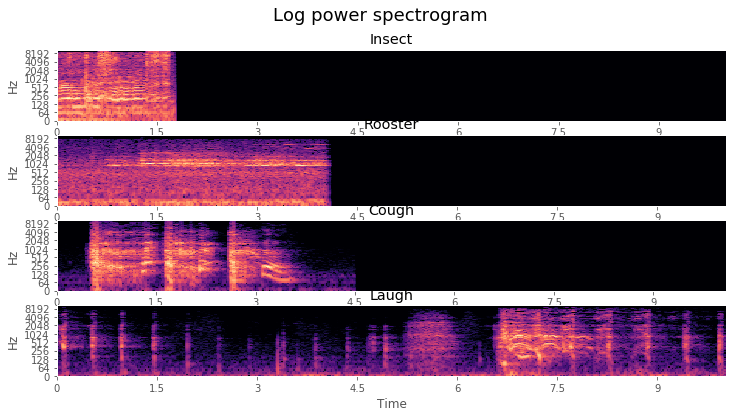

In [22]:
plot_log_power_spectrograms(sound_names, sound_signals)

You can also notice some similarities between sounds of the same class, and differences across sound classes.

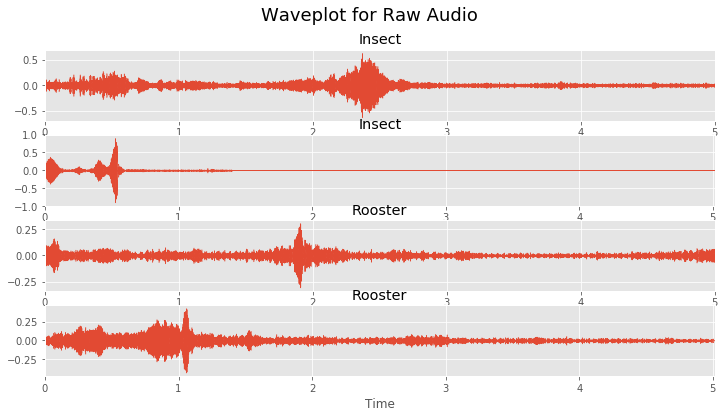

In [23]:
sound_signals = get_raw_sounds(samples_dict.get('insects') + samples_dict.get('rooster'))
sound_names = ['insect', 'insect', 'rooster', 'rooster'] 
plot_waves(sound_names, sound_signals)

#### Speech Features

If we can model how sound is generated (by humans and other sources) and how we hear sound, we’ll get good features. For instance, speech generated by humans is filtered and modified by the shape of the vocal tract. If we can model this shape well, we can accurately represent phonemes. If we can model this for short durations over time, we can represent sequences of phonemes that are being produced.

In [58]:
ts, sr = librosa.load(sample_insect, sr=44100)
print 'Sampling Rate:', sr
print 'Number of Amplitude Samples:', len(ts)
print 'Duration of file:', len(ts) / sr, 'seconds'
print 'First 100 samples:\n', ts[:100]

Sampling Rate: 16000
Number of Amplitude Samples: 80040
Duration of file: 5 seconds
First 100 samples:
[-0.03389606 -0.05069605 -0.02642519 -0.01989887 -0.02596948  0.01117801
  0.0004405   0.00330494  0.03132441  0.00762418  0.00738513 -0.01282651
 -0.00427909 -0.00940616 -0.01118919 -0.01320426 -0.02522859 -0.03067319
 -0.04063303 -0.03360131 -0.04109933 -0.03656557 -0.03844074 -0.02741953
 -0.01792245 -0.02142989 -0.02103533 -0.02502997 -0.02765447 -0.04052966
 -0.03324717 -0.0351853  -0.03670156 -0.02239143 -0.02449604 -0.01865955
 -0.02572539 -0.00980799 -0.02303079 -0.03628864 -0.02324776 -0.04013262
 -0.02423249 -0.00429147 -0.0235154  -0.02737314 -0.01445006 -0.04174364
 -0.04122018 -0.01446364 -0.02852685 -0.03199136 -0.03358673 -0.02762741
 -0.02026068 -0.02775937 -0.00315095 -0.00404221  0.01012855  0.0219454
  0.02892357  0.03294317  0.02340405  0.03931184  0.03463749  0.01631285
  0.00081223  0.01103196  0.00528037  0.0062323  -0.00213845 -0.00446742
  0.00254441 -0.008820

In [132]:
frame_len = 20
num_frames = 5000 / frame_len
n = len(ts) / num_frames
insect_frames = [ts[i : i + n] for i in xrange(0, len(ts), n)]

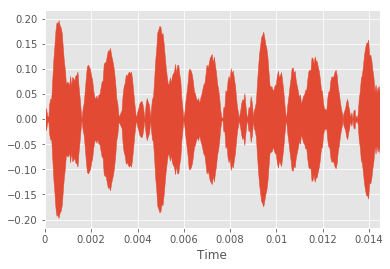

In [139]:
librosa.display.waveplot(insect_frames[0])

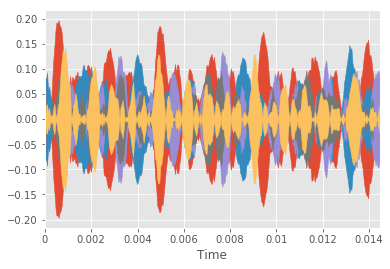

In [134]:
for i in range(5):
    librosa.display.waveplot(insect_frames[i])

Similarly, the cochlea, which is an organ is the ear, vibrates at different locations depending on the frequency of the incoming signal. Based on the locations of the vibrations, the brain gets information about the frequencies present in the signal.

#### MFCC

In MFCC, we do the following: 
- break the signal into short frames 
- within short frames, the signal does not change a lot
- we then compute the power spectrum (spectral density) of each frame
- humans can only discern frequency changes in a certain range, so we apply filters to scale the energies
- we take a log of this — motivated by human hearing. our hearing is not linear (even decibel is measured on a log scale)
- finally a DCT is done — you can think of it as a dimensionality reduction technique or a method of highlighting variances by removing strongly correlated features. At the end of the DCT, we get what are called as Cepstral Coefficients. Depending on the application, only a bunch of them are used. In ASR, the lower 13 coefficients are used.

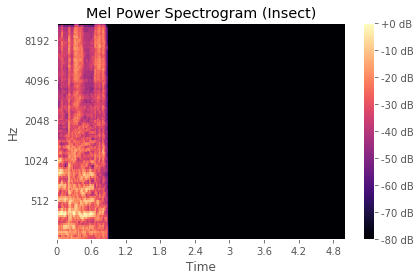

In [24]:
ts_insect, sr_insect = librosa.load(sample_insect, sr=41000)

# Create a Mel Spectrogram
spectrogram_insect = librosa.feature.melspectrogram(ts_insect, sr=sr_insect, n_mels=128)
# Convert to log scale (dB). We'll use the peak power as reference.
log_spectrogram_insect = librosa.logamplitude(spectrogram_insect, ref_power=np.max)
librosa.display.specshow(log_spectrogram_insect, sr=sr_insect, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('Mel Power Spectrogram (Insect)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

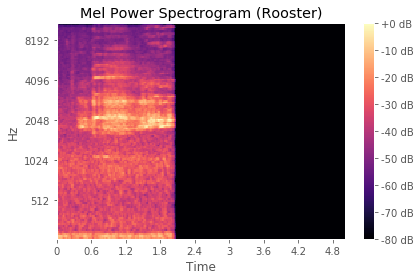

In [25]:
ts_rooster, sr_rooster = librosa.load(sample_rooster)
# Create a Mel Spectrogram
spectrogram_rooster = librosa.feature.melspectrogram(ts_rooster, sr=sr_rooster, n_mels=128)
# Convert to log scale (dB). We'll use the peak power as reference.
log_spectrogram_rooster = librosa.logamplitude(spectrogram_rooster, ref_power=np.max)
librosa.display.specshow(log_spectrogram_rooster, sr=sr_rooster, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('Mel Power Spectrogram (Rooster)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

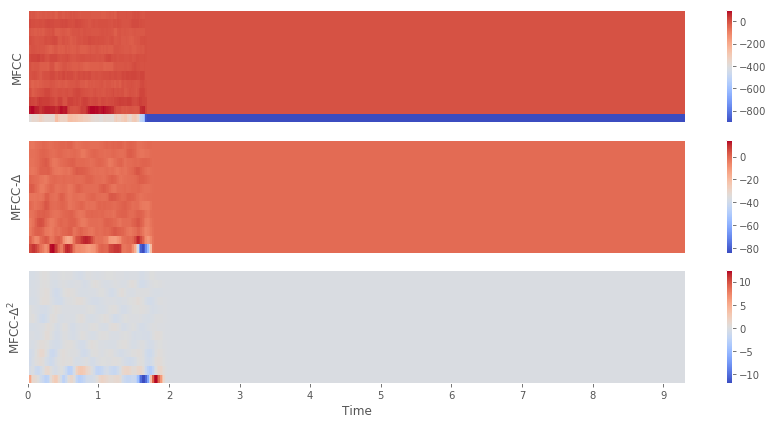

In [26]:
# Extract MFCC features
mfcc = librosa.feature.mfcc(S=log_spectrogram_insect, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

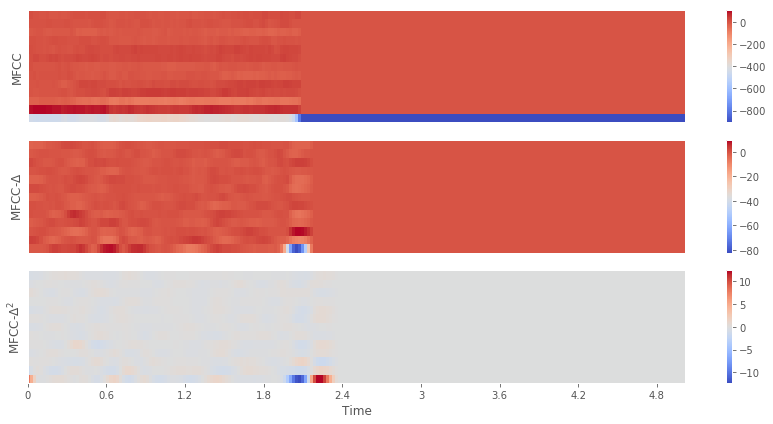

In [27]:
# Extract MFCC features
mfcc = librosa.feature.mfcc(S=log_spectrogram_rooster, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()